# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
load_dotenv()

True

In [4]:
# Read your api key environment variable
api_key = os.getenv('NEWSAPI_KEY')
type(api_key)

str

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin',
                                      language = 'en',
                                      page_size = 100,
                                      sort_by = 'relevancy')

bitcoin_news['articles'][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Jay Peters',
 'title': 'Block and Blockstream are partnering with Tesla on an off-grid, solar-powered Bitcoin mine in Texas',
 'description': 'Block and Blockstream are partnering with Tesla on an open-source, solar-powered Bitcoin mine, the companies announced Friday. Tesla’s 3.8-megawatt Solar PV array and its 12 megawatt-hour Megapack will power the facility, and construction has started on the p…',
 'url': 'https://www.theverge.com/2022/4/8/23016553/block-blockstream-tesla-solar-bitcoin-mine-texas',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/OYrvaaOHBuEpdTeRO55nZnZdexs=/0x215:3000x1786/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8937281/acastro_170726_1777_0007_v2.jpg',
 'publishedAt': '2022-04-08T16:02:52Z',
 'content': 'Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\n

In [7]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum',
                                      language = 'en',
                                      page_size = 100,
                                      sort_by = 'relevancy')

ethereum_news['articles'][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Emma Roth',
 'title': 'US blames North Korean hacker group for $625 million Axie Infinity theft',
 'description': 'The US Department of Treasury has attributed the $625 Axie Infinity theft to Lazarus, a North Korean hacking group with ties to the country’s intelligence agency.',
 'url': 'https://www.theverge.com/2022/4/14/23025739/north-korean-hacker-lazarus-axie-infinity-cryptocurrency-hack-theft-us-blames',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/n8TGCqcud7UHPIbtgxLi10Owa5I=/0x52:1018x585/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23374959/Screen_Shot_2022_03_30_at_10.10.00_AM.png',
 'publishedAt': '2022-04-14T21:43:57Z',
 'content': 'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]'}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']

        bitcoin_sentiments.append({
            'text' : text,
            'date' : date,
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu
        })
    
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,Its set to open later this year\r\nIf you buy ...,2022-04-08,-0.4404,0.000,0.081,0.919
1,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.000,0.912
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772
3,"You might have heard of crypto Twitter, the co...",2022-04-05,-0.2732,0.000,0.057,0.943
4,The wallet will have USB-C and a fingerprint r...,2022-04-06,-0.4404,0.000,0.088,0.912


In [9]:
# Create the Ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']

        ethereum_sentiments.append({
            'text' : text,
            'date' : date,
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu
        })
    
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,The US Department of Treasury says Lazarus is ...,2022-04-14,-0.7845,0.088,0.231,0.681
1,"18 with 15 posters participating, including st...",2022-04-13,0.1027,0.084,0.071,0.844
2,"This week, the cryptocurrency network Ronin di...",2022-04-03,-0.4215,0.051,0.098,0.851
3,"Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.7351,0.188,0.000,0.812
4,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.159301,0.069830,0.032530,0.897660
std,0.398797,0.075263,0.056493,0.092274
min,-0.872000,0.000000,0.000000,0.567000
25%,0.000000,0.000000,0.000000,0.848500
50%,0.115350,0.069000,0.000000,0.915500
75%,0.462950,0.105750,0.067250,1.000000
max,0.952000,0.378000,0.329000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.205717,0.089360,0.035460,0.875170
std,0.407437,0.089831,0.048059,0.095665
min,-0.784500,0.000000,0.000000,0.594000
25%,-0.083575,0.000000,0.000000,0.816500
50%,0.215150,0.074500,0.000000,0.896000
75%,0.536275,0.135000,0.063750,0.938500
max,0.952000,0.378000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the higher mean positive score. This indicates that ethereum has a more positive sentiment or attitude, in the articles. 

Q: Which coin had the highest compound score?

A: Ethereum and Bitcoin have an equal compound score. 

Q. Which coin had the highest positive score?

A: Ethereum and Bitcoin have an equal overall positive score. Indicating that people are just as equally excited to talk about both coins. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords


# Expand the default stopwords list if necessary


In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].fillna('').apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Its set to open later this year\r\nIf you buy ...,2022-04-08,-0.4404,0.000,0.081,0.919,"[set, open, later, yearif, buy, something, ver..."
1,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,"You might have heard of crypto Twitter, the co...",2022-04-05,-0.2732,0.000,0.057,0.943,"[might, heard, crypto, twitter, corner, social..."
4,The wallet will have USB-C and a fingerprint r...,2022-04-06,-0.4404,0.000,0.088,0.912,"[wallet, usbc, fingerprint, reader, image, jes..."


In [19]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].fillna('').apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,The US Department of Treasury says Lazarus is ...,2022-04-14,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,"18 with 15 posters participating, including st...",2022-04-13,0.1027,0.084,0.071,0.844,"[poster, participating, including, story, auth..."
2,"This week, the cryptocurrency network Ronin di...",2022-04-03,-0.4215,0.051,0.098,0.851,"[week, cryptocurrency, network, ronin, disclos..."
3,"Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
4,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_freq = []
for words in bitcoin_df['tokens']:
    bitcoin_freq = bitcoin_freq + words 

bitcoin_ngrams = Counter(ngrams(bitcoin_freq, n=2))
#print(dict(bitcoin_ngrams))

In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_freq = []
for words in ethereum_df['tokens']:
    ethereum_freq = ethereum_freq + words 

ethereum_ngrams = Counter(ngrams(ethereum_freq, n=2))
#print(dict(ethereum_ngrams))

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_ngrams)

[(('april', 'reuters'), 20),
 (('char', 'april'), 6),
 (('char', 'bitcoin'), 5),
 (('bitcoin', 'conference'), 5),
 (('warren', 'buffett'), 4),
 (('cash', 'app'), 4),
 (('char', 'new'), 4),
 (('new', 'york'), 4),
 (('char', 'london'), 4),
 (('london', 'april'), 4)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_ngrams)

[(('april', 'reuters'), 8),
 (('char', 'april'), 7),
 (('north', 'korean'), 6),
 (('char', 'us'), 6),
 (('five', 'year'), 5),
 (('ethereum', 'eth'), 5),
 (('us', 'treasury'), 4),
 (('treasury', 'department'), 4),
 (('axie', 'infinity'), 4),
 (('bloomberg', 'intelligence'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

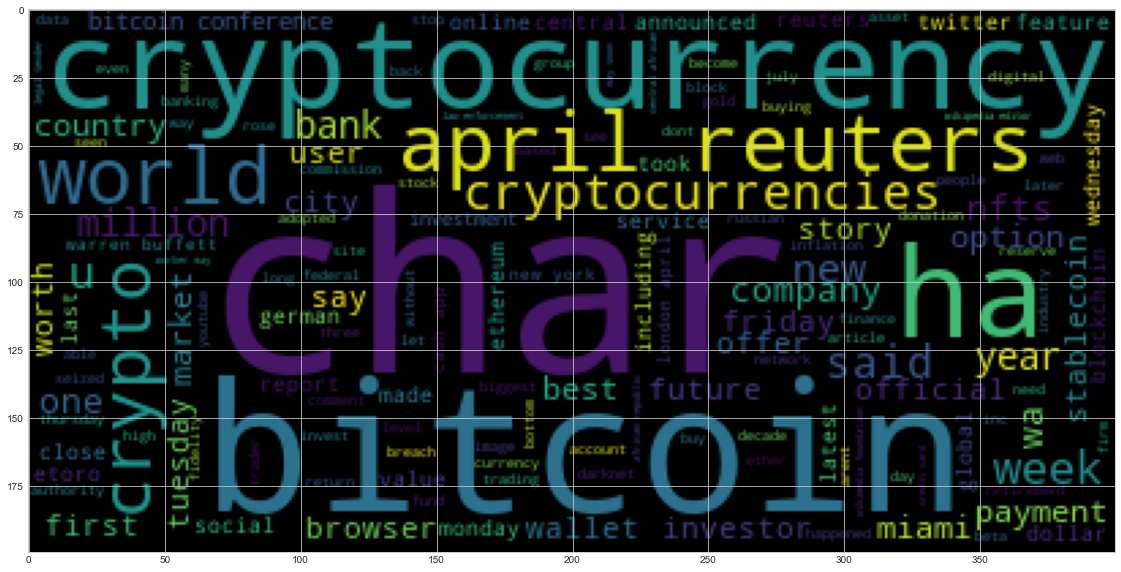

In [28]:
# Generate the Bitcoin word cloud
bitcoin_freq_join = ' '.join(bitcoin_freq)
wc = WordCloud().generate(bitcoin_freq_join)
plt.imshow(wc)

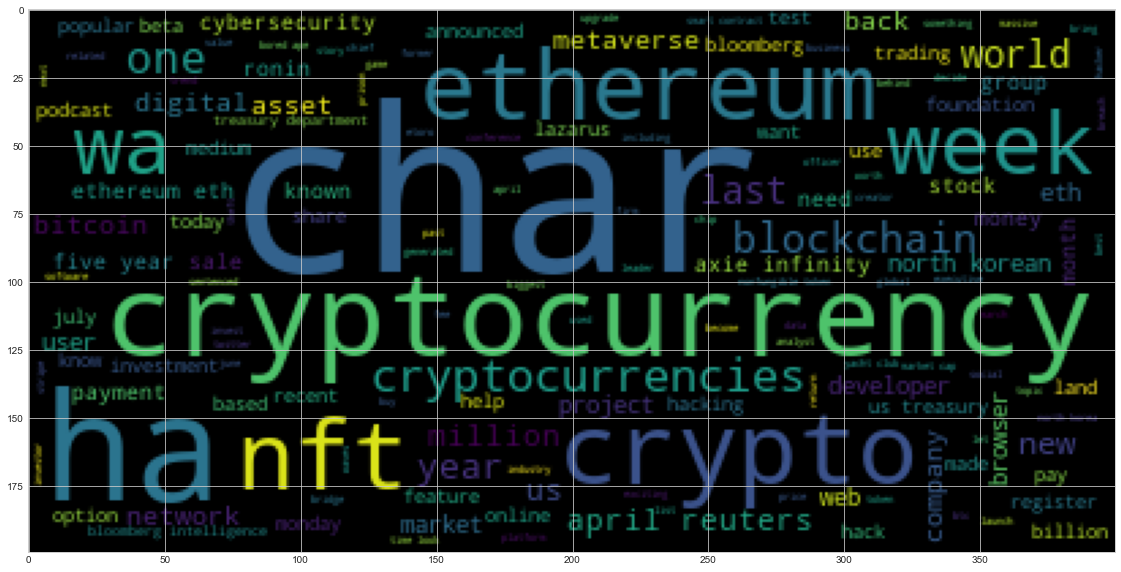

In [29]:
# Generate the Ethereum word cloud
ethereum_freq_join = ' '.join(ethereum_freq)
wc = WordCloud().generate(ethereum_freq_join)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Concatenate all of the Bitcoin text together
bitcoin_corpus = ' '.join(bitcoin_df['text'].values)

In [36]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_corpus)

# Add a title to the document
bitcoin_ner.user_data['title'] = 'Bitcoin Text'

In [37]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [39]:
# List all Entities
btc_ent_list = [ent.text for ent in bitcoin_ner.ents]
btc_ent_list[:10]

['later this year',
 'Verge',
 'Vox Media',
 'Alex Castro',
 'Verge',
 'Wikipedia',
 "the Wikimedia Foundation's",
 'Ars Technica',
 'GorillaWarfare',
 'Warren Buffett']

---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
ethereum_corpus = ' '.join(ethereum_df['text'].values)

In [42]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_corpus)

# Add a title to the document
ethereum_ner.user_data['title'] = 'Ethereum Text'

In [43]:
# Render the visualization
displacy.render(ethereum_ner, style= 'ent')

In [44]:
# List all Entities
eth_entities_list = [ent.text for ent in ethereum_ner.ents]
eth_entities_list[:10]

['The US Department of Treasury',
 'Lazarus',
 'The US Treasury Department',
 'North Korean',
 'Lazarus',
 '$625 million',
 'Ronin',
 '18',
 '15',
 'More than 200']

---